In [1]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Read the data as dataframe

mydata = pd.read_csv('insurance.csv')


In [3]:
# Shape of Data 

mydata.shape

(1338, 7)

In [4]:
# Data Type of each attribute 

mydata.dtypes

# 'sex', 'smoker' and 'region' are 'object' so they have string values. Others are numerical values.

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Checking the presnece of missing values 
pd.DataFrame( mydata.isnull().sum(), columns= ['Number of missing values'])

#Since the output is 0 for all attributes, it indicates there are no missing values in the dataset.

,Number of missing values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
# 5 point summary of numerical attributes

print(mydata['age'].describe()[['min','25%','50%','75%','max']]) #Age
print(mydata['bmi'].describe()[['min','25%','50%','75%','max']]) #BMI
print(mydata['children'].describe()[['min','25%','50%','75%','max']]) #Children
print(mydata['charges'].describe()[['min','25%','50%','75%','max']]) #Charges

#The 5 point summary can also be achieved using describe() funaction, owever it will gove more output that
#required by the problem statement hence using only 5 points as attributes to the describe function

min    18.0
25%    27.0
50%    39.0
75%    51.0
max    64.0
Name: age, dtype: float64
min    15.96000
25%    26.29625
50%    30.40000
75%    34.69375
max    53.13000
Name: bmi, dtype: float64
min    0.0
25%    0.0
50%    1.0
75%    2.0
max    5.0
Name: children, dtype: float64
min     1121.873900
25%     4740.287150
50%     9382.033000
75%    16639.912515
max    63770.428010
Name: charges, dtype: float64


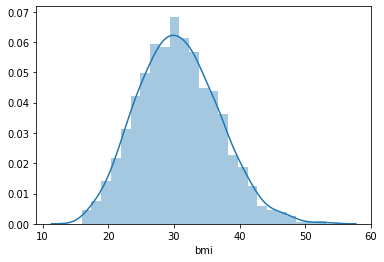

In [7]:
# Distribution of 'bmi' column

sns.distplot(mydata.bmi)

#bmi looks like a uniform distribution

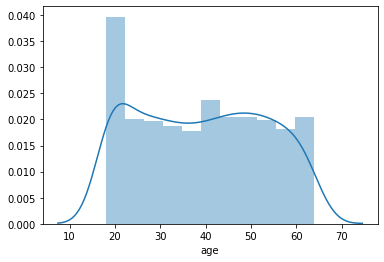

In [8]:
# Distribution of 'age' column

sns.distplot(mydata.age)

#Age looks like a non-uniform distribution. 

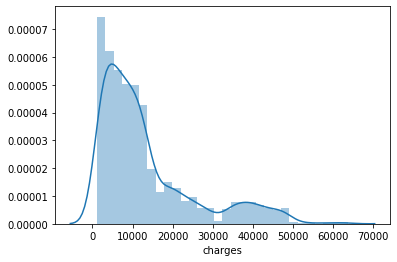

In [9]:
# Distribution of 'charges' column

sns.distplot(mydata.charges)

# Charges look like a non-uniform distribution, skewed towards right.

In [10]:
# Measure of skewness of ‘bmi’ column

mydata.bmi.skew()

#The skewness is > 0. Indicates there is more weight in the left tail of the distribution. 
#However, the value is cliose to 0, hence there this weight is not a lot

0.2840471105987448

In [11]:
# Measure of skewness of ‘age’ column

mydata.age.skew()

#The skewness is almost zero, it indicates the data is normally distributed. 
#However, the graph above shows a non-uniform distribution. 
#This is because there is limited difference of weights on both sides of mean but mean and meadian values are apart

0.05567251565299186

In [12]:
# Measure of skewness of ‘charges’ column

mydata.charges.skew()

# A positive number >0 indicates that left tail carries a lot more weight than right tail

1.5158796580240388

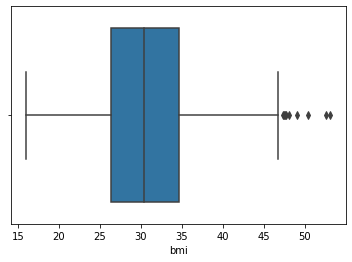

In [13]:
# Checking the presence of outliers in ‘bmi’ column

sns.boxplot(x=mydata['bmi'])

#the dots outside of right whisker indicate the presence of outliers in the bmi column

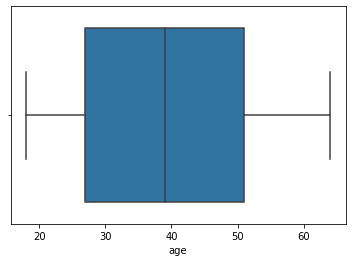

In [14]:
# Checking the presence of outliers in ‘age’ column

sns.boxplot(x=mydata['age'])

#No dots outside of anywhisker - no outliers in the age column

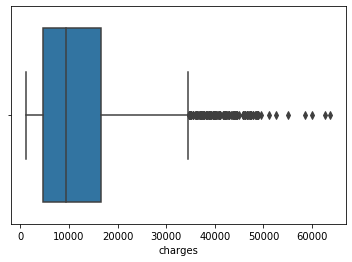

In [15]:
# Checking the presence of outliers in ‘charges' column

sns.boxplot(x=mydata['charges'])

#the dots outside of right whisker indicate the presence of outliers in the charges column

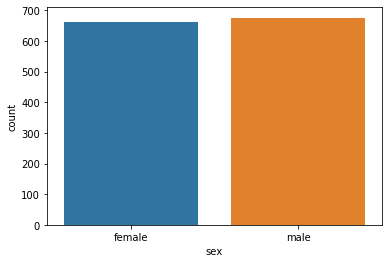

In [16]:
# Distribution of categorical columns (include children) 

sns.countplot(x="sex", data=mydata)

#The categorical valriable, sex, is quite evenly distributed between its 2 possible values

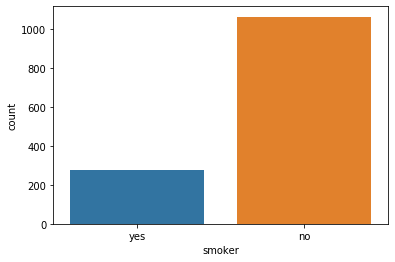

In [17]:
# Distribution of categorical columns (include children) 

sns.countplot(x="smoker", data=mydata)

#The number of non-smokers are much more than the number of smokers in the data

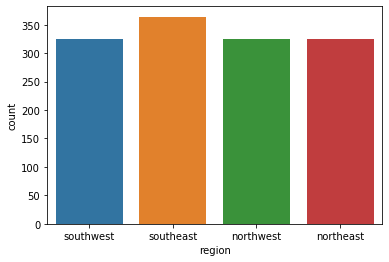

In [18]:
# Distribution of categorical columns (include children) 

sns.countplot(x="region", data=mydata)

#The number of datapoints from southeast region are slighly more that other 3 regions. Other 3 are more or less same.

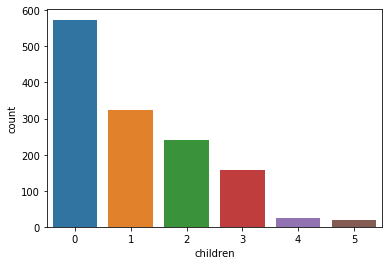

In [19]:
# Distribution of categorical columns (include children) 

sns.countplot(x="children", data=mydata)

#Number of children is 0 for most of the data points, followed by 1 child, 2 children and so on. 
#No more than 5 children exists for any of the rows

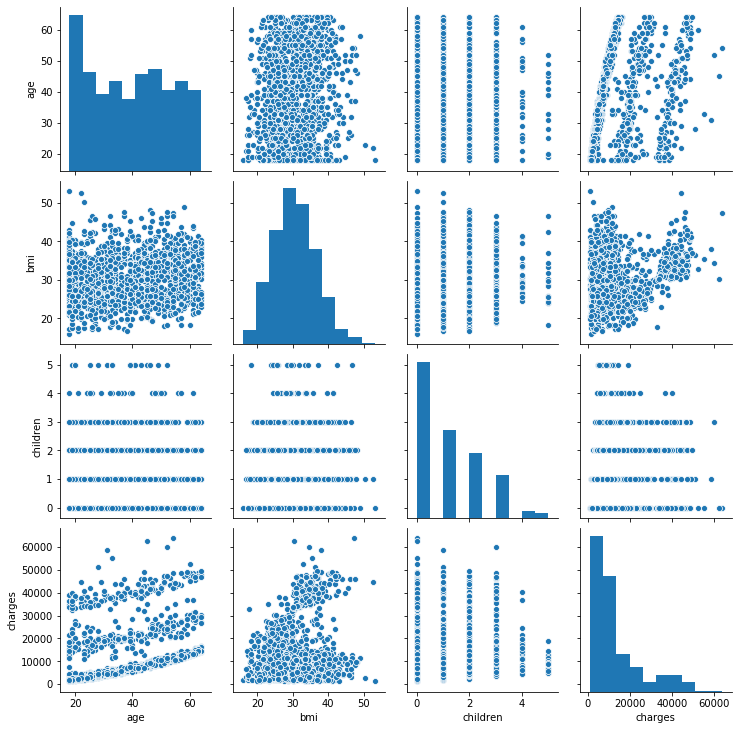

In [20]:
# Pair plot that includes all the columns of the data frame

sns.pairplot(mydata) 

# The plot between ‘age’ and ‘bmi’ does not indicate any relationship.  It has no direction. 
# Similiarly, between the ‘age’ and ‘charges’ atrributes, there is no clear relationship as well.
# Although there appears to be 3 lines of positive relationship between them. 
# It means, there are 3 sets of charges which increase gradually with age. 
# No clear relation between ‘age’ and ‘children’. 
# The range of ‘bmi’ decreases with increase in children, there are some extreme values in ‘bmi’ where children value 5. 
# There is very little positive relation between ‘bmi’ and ‘charges’, the plot is directionless on initial values of ‘charges’
# The range of ‘charges’ also decreases with increase in the value of ‘children’.



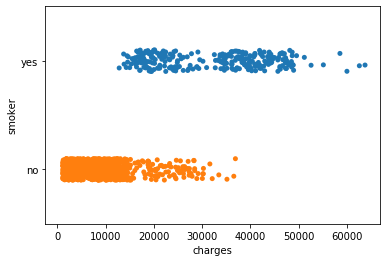

In [21]:
# Do charges of people who smoke differ significantly from the people who don't?
sns.stripplot(mydata['charges'], mydata['smoker'])

# The stripplot indicates that there difference in charges for people who smoke from the people who do not smoke, 
# Smokers generally incur higher chrges, however there are overlapping values, so difference is not significantly high

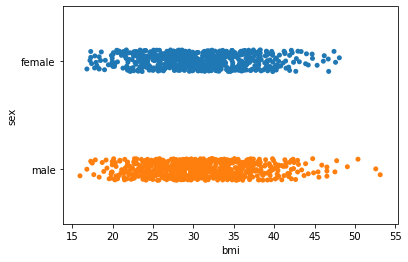

In [22]:
# Does bmi of males differ significantly from that of females?
sns.stripplot(mydata['bmi'], mydata['sex'])

#No significant difference is visible in the bmi of males vs females from the stripplot below


In [23]:
# Is the proportion of smokers significantly different in different genders? (chi-square)
print("Total count of smokers is ", mydata[mydata['smoker']=='yes'].shape[0]) 
print("Total count of male smokers is ", mydata[mydata['smoker']=='yes'][mydata['sex']=='male'].shape[0]) 
print("Total count of female smokers is ", mydata[mydata['smoker']=='yes'][mydata['sex']=='female'].shape[0]) 
print("Proportion of smokers who are male is ", (mydata[mydata['smoker']=='yes'][mydata['sex']=='male'].shape[0])/mydata[mydata['smoker']=='yes'].shape[0]) 
print("Proportion of smokers who are female is ", (mydata[mydata['smoker']=='yes'][mydata['sex']=='female'].shape[0])/mydata[mydata['smoker']=='yes'].shape[0])

# Since 58% of smokers are male and 42% are female - the difference is not significant

Total count of smokers is  274
Total count of male smokers is  159
Total count of female smokers is  115
Proportion of smokers who are male is  0.5802919708029197
Proportion of smokers who are female is  0.4197080291970803


C:\Users\nipgupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nipgupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\nipgupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\nipgupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


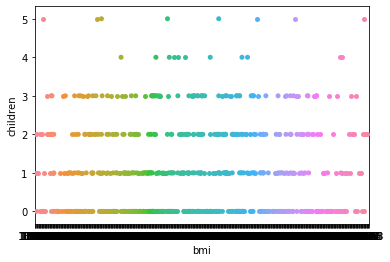

In [24]:
# Is the distribution of bmi across women with no children, one child and two children, the same? 

sns.stripplot (mydata['bmi'], mydata[mydata['sex']=='female']['children'])

#BMI distribution across women with no children, one child and two children are nearly same